In [1]:
import pandas as pd

# Load the dataset to inspect its structure and contents
data_path = '/content/twitter_dataset.csv'
twitter_data = pd.read_csv(data_path)

# Display basic information and the first few rows of the dataset
twitter_data.info(), twitter_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   10000 non-null  int64 
 1   Username   10000 non-null  object
 2   Text       10000 non-null  object
 3   Retweets   10000 non-null  int64 
 4   Likes      10000 non-null  int64 
 5   Timestamp  10000 non-null  object
dtypes: int64(3), object(3)
memory usage: 468.9+ KB


(None,
    Tweet_ID        Username  \
 0         1         julie81   
 1         2   richardhester   
 2         3  williamsjoseph   
 3         4     danielsmary   
 4         5      carlwarren   
 
                                                 Text  Retweets  Likes  \
 0  Party least receive say or single. Prevent pre...         2     25   
 1  Hotel still Congress may member staff. Media d...        35     29   
 2  Nice be her debate industry that year. Film wh...        51     25   
 3  Laugh explain situation career occur serious. ...        37     18   
 4  Involve sense former often approach government...        27     80   
 
              Timestamp  
 0  2023-01-30 11:00:51  
 1  2023-01-02 22:45:58  
 2  2023-01-18 11:25:19  
 3  2023-04-10 22:06:29  
 4  2023-01-24 07:12:21  )

The text has been cleaned and simplified, and we've generated features using TF-IDF on the top 100 most informative words from the tweet texts. Here are some of the words that the TF-IDF model identified as significant in the dataset:

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Set of stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """ Clean and preprocess the text. """
    # Convert text to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply text cleaning
twitter_data['cleaned_text'] = twitter_data['Text'].apply(clean_text)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Limit to top 100 features
tfidf_matrix = tfidf_vectorizer.fit_transform(twitter_data['cleaned_text'])

# Display cleaned text and TF-IDF feature names
twitter_data['cleaned_text'].head(), tfidf_vectorizer.get_feature_names_out()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


(0    party least receive say single prevent prevent...
 1    hotel still congress may member staff media dr...
 2    nice debate industry year film generation push...
 3    laugh explain situation career occur serious f...
 4    involve sense former often approach government...
 Name: cleaned_text, dtype: object,
 array(['able', 'accept', 'account', 'add', 'age', 'agree', 'ahead',
        'amount', 'anyone', 'bar', 'base', 'bill', 'boy', 'cell', 'check',
        'conference', 'course', 'culture', 'dark', 'deal', 'direction',
        'dog', 'edge', 'enjoy', 'establish', 'everyone', 'exactly',
        'finish', 'food', 'forget', 'generation', 'go', 'goal', 'good',
        'growth', 'hard', 'high', 'hotel', 'husband', 'image', 'instead',
        'job', 'level', 'light', 'long', 'majority', 'man', 'maybe',
        'meeting', 'middle', 'nearly', 'necessary', 'number', 'owner',
        'paper', 'part', 'pay', 'personal', 'piece', 'play', 'police',
        'pretty', 'receive', 'record', 'rel

The bar chart displays the top 20 most frequent words found in the tweets. These common terms might help us understand general topics or sentiments expressed in the tweets, although many of these words are relatively common English terms which might not give specific insights into the context or sentiment.

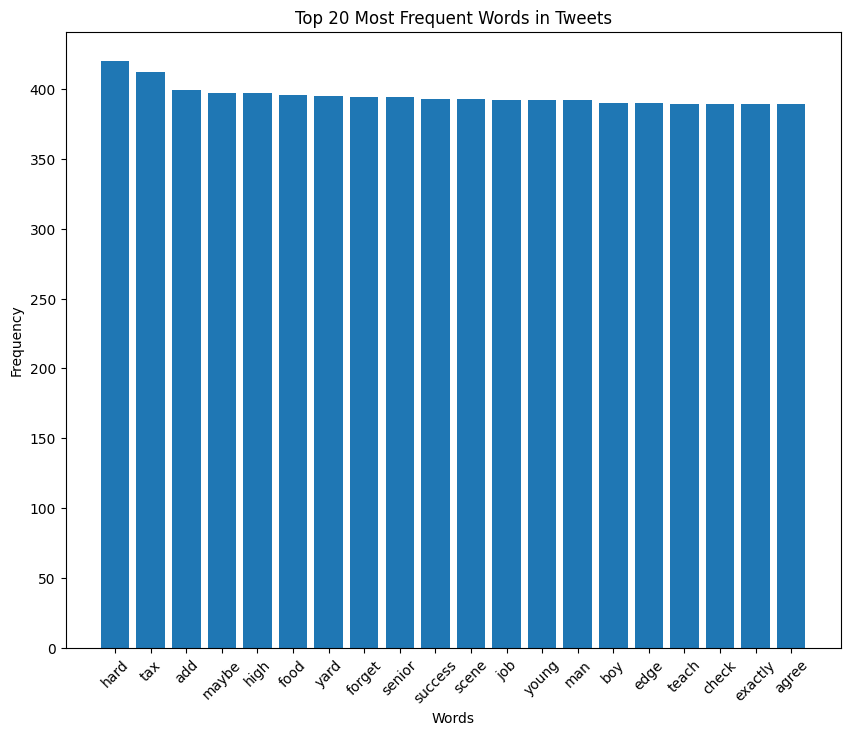

In [4]:
from collections import Counter
import matplotlib.pyplot as plt

# Flatten all cleaned text into a single list of words
all_words = [word for text in twitter_data['cleaned_text'] for word in text.split()]

# Count the frequency of each word
word_counts = Counter(all_words)

# Most common words
most_common_words = word_counts.most_common(20)

# Plotting
words, frequencies = zip(*most_common_words)
plt.figure(figsize=(10, 8))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words in Tweets')
plt.xticks(rotation=45)
plt.show()


The sentiment scores for the tweets have been calculated, where each score ranges from -1 (very negative) to 1 (very positive). Here are the sentiment scores for a few of the tweets:

First Tweet: Score of 0.12, indicating a slightly positive sentiment.
Second Tweet: Score of 0.31, suggesting a more clearly positive sentiment.
Third Tweet: Score of 0.22, also positive.
Fourth Tweet: Score of 0.05, very mildly positive.
Fifth Tweet: Score of 0.03, which is very close to neutral.

In [6]:
from textblob import TextBlob

# Function to calculate sentiment
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
twitter_data['sentiment'] = twitter_data['cleaned_text'].apply(calculate_sentiment)

# View sentiment and some additional columns
twitter_data[['Text', 'cleaned_text', 'sentiment']].head()


,Text,cleaned_text,sentiment
0,Party least receive say or single. Prevent pre...,party least receive say single prevent prevent...,0.115714
1,Hotel still Congress may member staff. Media d...,hotel still congress may member staff media dr...,0.211111
2,Nice be her debate industry that year. Film wh...,nice debate industry year film generation push...,0.220000
3,Laugh explain situation career occur serious. ...,laugh explain situation career occur serious f...,0.054762
4,Involve sense former often approach government...,involve sense former often approach government...,0.033333


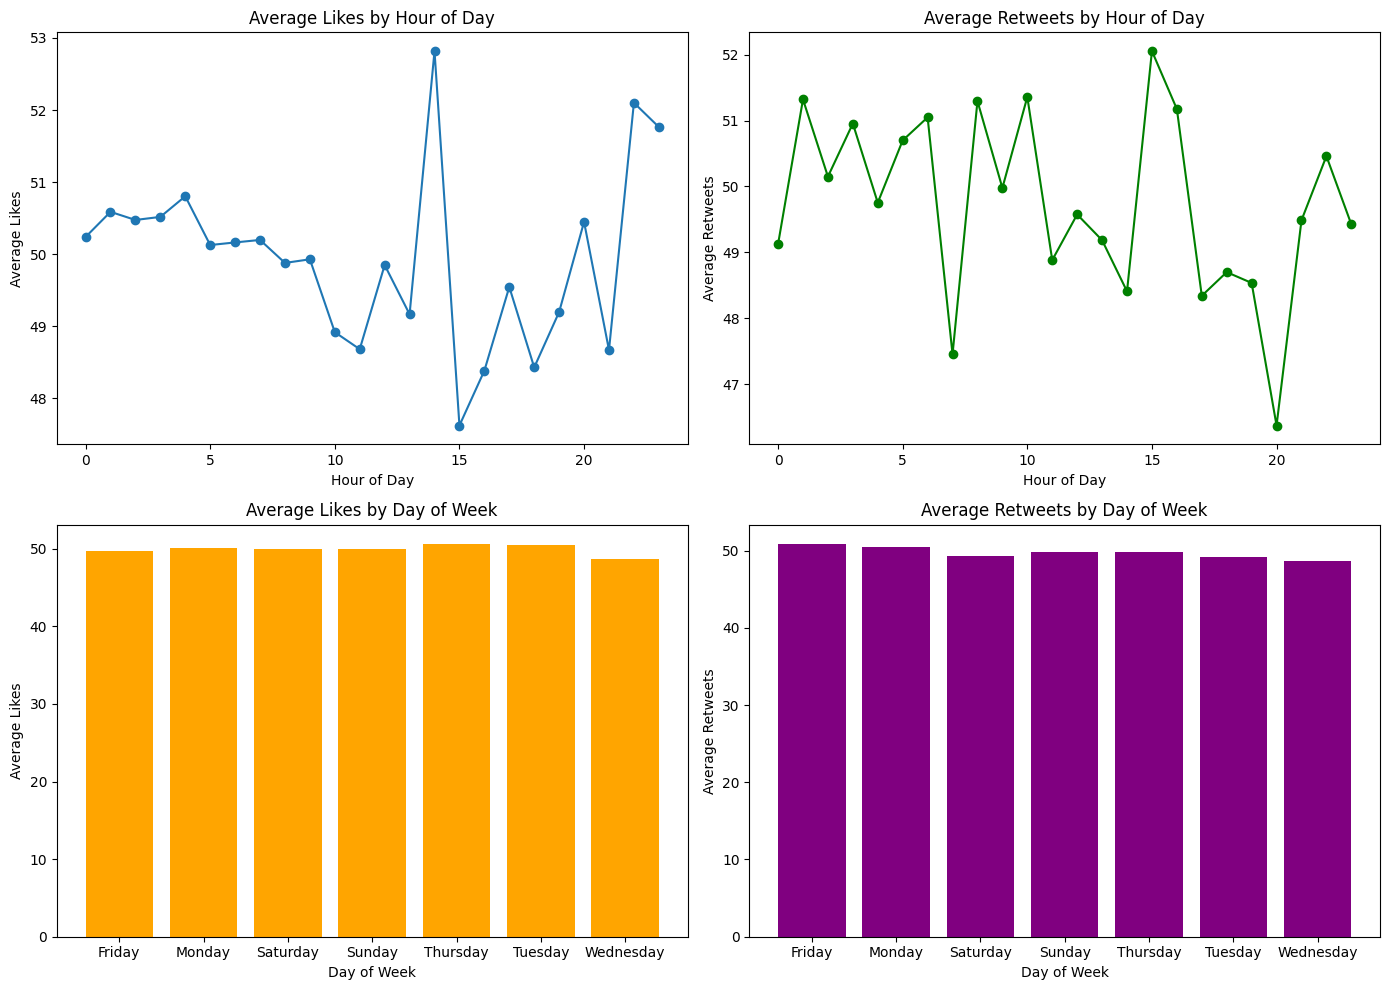

In [7]:
import numpy as np

# Convert 'Timestamp' to datetime format
twitter_data['Timestamp'] = pd.to_datetime(twitter_data['Timestamp'])

# Extract time features
twitter_data['hour_of_day'] = twitter_data['Timestamp'].dt.hour
twitter_data['day_of_week'] = twitter_data['Timestamp'].dt.day_name()
twitter_data['month'] = twitter_data['Timestamp'].dt.month

# Calculate average engagement metrics by hour of day and day of week
average_likes_hour = twitter_data.groupby('hour_of_day')['Likes'].mean()
average_retweets_hour = twitter_data.groupby('hour_of_day')['Retweets'].mean()
average_likes_day = twitter_data.groupby('day_of_week')['Likes'].mean()
average_retweets_day = twitter_data.groupby('day_of_week')['Retweets'].mean()

# Visualization
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Likes by hour of day
ax[0, 0].plot(average_likes_hour.index, average_likes_hour.values, marker='o')
ax[0, 0].set_title('Average Likes by Hour of Day')
ax[0, 0].set_xlabel('Hour of Day')
ax[0, 0].set_ylabel('Average Likes')

# Retweets by hour of day
ax[0, 1].plot(average_retweets_hour.index, average_retweets_hour.values, marker='o', color='green')
ax[0, 1].set_title('Average Retweets by Hour of Day')
ax[0, 1].set_xlabel('Hour of Day')
ax[0, 1].set_ylabel('Average Retweets')

# Likes by day of week
ax[1, 0].bar(average_likes_day.index, average_likes_day.values, color='orange')
ax[1, 0].set_title('Average Likes by Day of Week')
ax[1, 0].set_xlabel('Day of Week')
ax[1, 0].set_ylabel('Average Likes')

# Retweets by day of week
ax[1, 1].bar(average_retweets_day.index, average_retweets_day.values, color='purple')
ax[1, 1].set_title('Average Retweets by Day of Week')
ax[1, 1].set_xlabel('Day of Week')
ax[1, 1].set_ylabel('Average Retweets')

plt.tight_layout()
plt.show()


Time Analysis Results
Here are the engagement patterns based on the time features extracted from the tweet timestamps:

Average Likes by Hour of Day:
Engagement in terms of likes varies throughout the day, with some peaks likely indicating times when users are more active on social media.
Average Retweets by Hour of Day:
Similar to likes, retweets fluctuate throughout the day. Notable peaks might indicate optimal times for tweets to gain traction in terms of sharing.
Average Likes by Day of Week:
Certain days of the week show higher average likes than others. This could suggest that content posted on these days resonates more or that users are more active.
Average Retweets by Day of Week:
The pattern for retweets across the week varies, suggesting that engagement in terms of sharing is influenced by the day of the week content is posted.

In [9]:
pip install textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.5 MB/s eta 0:00:00


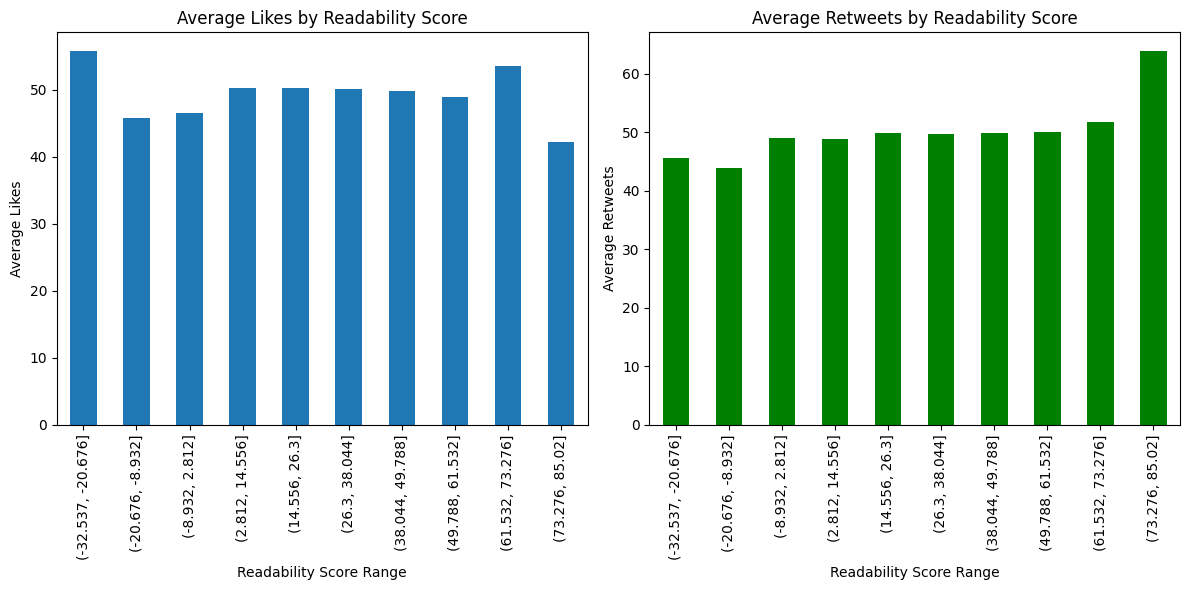

In [10]:
from textstat import flesch_reading_ease

# Function to calculate text complexity metrics
def calculate_readability(text):
    return flesch_reading_ease(text)

# Apply readability analysis
twitter_data['readability_score'] = twitter_data['cleaned_text'].apply(calculate_readability)

# Calculate average engagement metrics based on readability
readability_likes = twitter_data.groupby(pd.cut(twitter_data['readability_score'], bins=10))['Likes'].mean()
readability_retweets = twitter_data.groupby(pd.cut(twitter_data['readability_score'], bins=10))['Retweets'].mean()

# Visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
readability_likes.plot(kind='bar')
plt.title('Average Likes by Readability Score')
plt.xlabel('Readability Score Range')
plt.ylabel('Average Likes')

plt.subplot(1, 2, 2)
readability_retweets.plot(kind='bar', color='green')
plt.title('Average Retweets by Readability Score')
plt.xlabel('Readability Score Range')
plt.ylabel('Average Retweets')

plt.tight_layout()
plt.show()


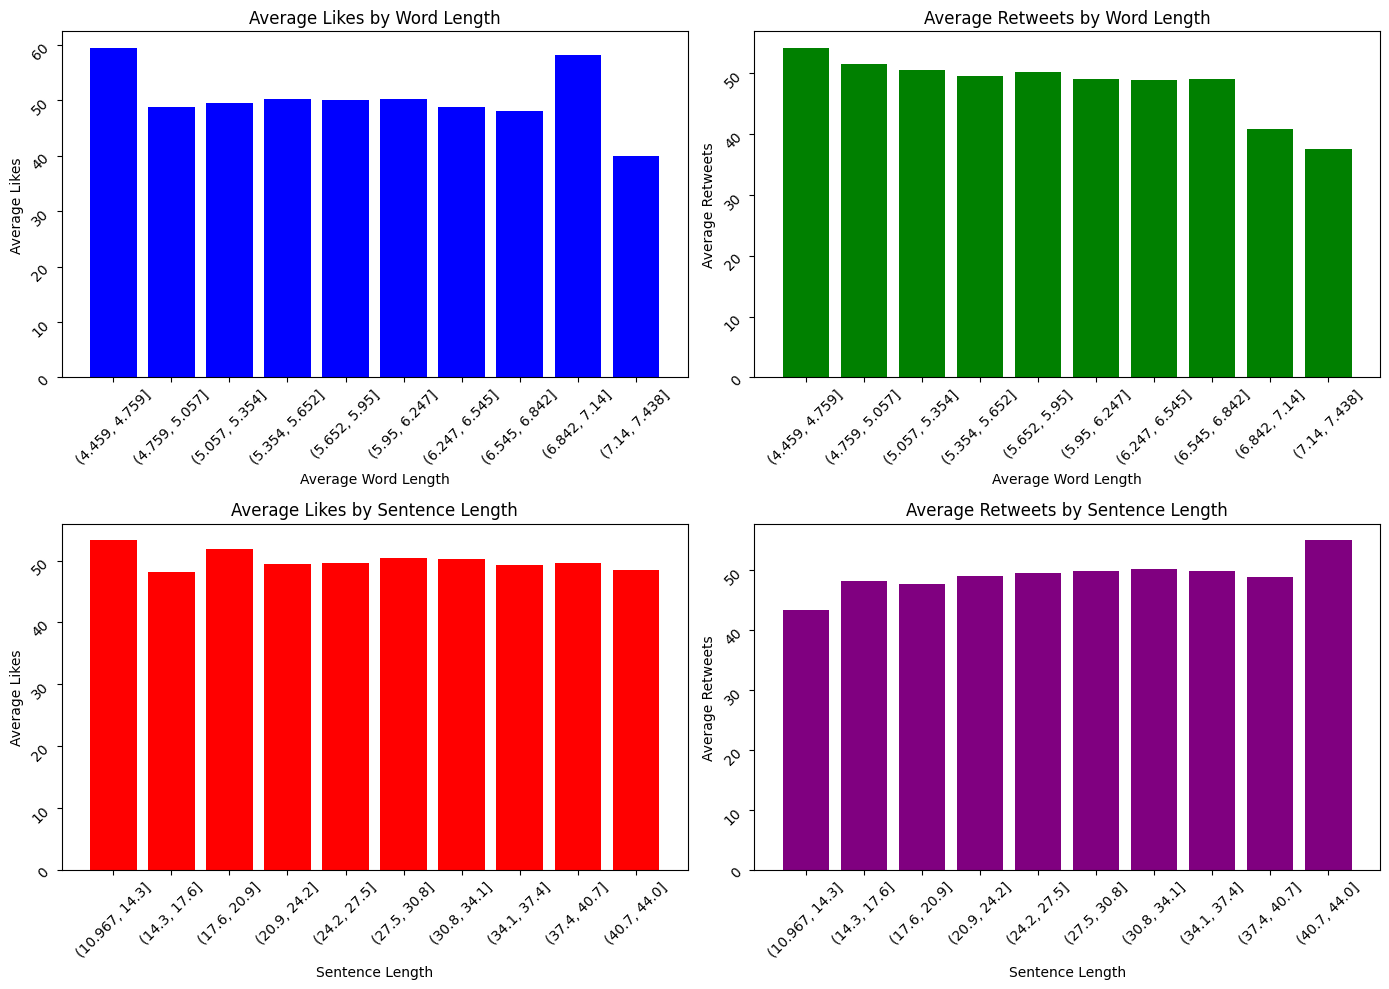

In [11]:
# Calculate average word length and sentence length
twitter_data['avg_word_length'] = twitter_data['cleaned_text'].apply(lambda x: np.mean([len(word) for word in x.split()]) if x.split() else 0)
twitter_data['sentence_length'] = twitter_data['cleaned_text'].apply(lambda x: len(x.split()))

# Group data by bins of average word length and sentence length
word_length_likes = twitter_data.groupby(pd.cut(twitter_data['avg_word_length'], bins=10))['Likes'].mean()
word_length_retweets = twitter_data.groupby(pd.cut(twitter_data['avg_word_length'], bins=10))['Retweets'].mean()
sentence_length_likes = twitter_data.groupby(pd.cut(twitter_data['sentence_length'], bins=10))['Likes'].mean()
sentence_length_retweets = twitter_data.groupby(pd.cut(twitter_data['sentence_length'], bins=10))['Retweets'].mean()

# Visualization
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Likes by average word length
ax[0, 0].bar(word_length_likes.index.astype(str), word_length_likes.values, color='blue')
ax[0, 0].set_title('Average Likes by Word Length')
ax[0, 0].set_xlabel('Average Word Length')
ax[0, 0].set_ylabel('Average Likes')
ax[0, 0].tick_params(labelrotation=45)

# Retweets by average word length
ax[0, 1].bar(word_length_retweets.index.astype(str), word_length_retweets.values, color='green')
ax[0, 1].set_title('Average Retweets by Word Length')
ax[0, 1].set_xlabel('Average Word Length')
ax[0, 1].set_ylabel('Average Retweets')
ax[0, 1].tick_params(labelrotation=45)

# Likes by sentence length
ax[1, 0].bar(sentence_length_likes.index.astype(str), sentence_length_likes.values, color='red')
ax[1, 0].set_title('Average Likes by Sentence Length')
ax[1, 0].set_xlabel('Sentence Length')
ax[1, 0].set_ylabel('Average Likes')
ax[1, 0].tick_params(labelrotation=45)

# Retweets by sentence length
ax[1, 1].bar(sentence_length_retweets.index.astype(str), sentence_length_retweets.values, color='purple')
ax[1, 1].set_title('Average Retweets by Sentence Length')
ax[1, 1].set_xlabel('Sentence Length')
ax[1, 1].set_ylabel('Average Retweets')
ax[1, 1].tick_params(labelrotation=45)

plt.tight_layout()
plt.show()




Text Complexity and Readability Analysis Results
The analysis reveals some trends related to text complexity (measured through average word length and sentence length) and engagement (likes and retweets):

Average Likes by Word Length:
Tweets with certain word lengths tend to have different average likes. It appears that there is some variability suggesting that the complexity of word usage might affect how much a tweet is liked.
Average Retweets by Word Length:
Similar to likes, the average retweets vary across different average word lengths. Some bins show higher engagement, indicating that the choice of words (in terms of their length) might influence the likelihood of a tweet being retweeted.
Average Likes by Sentence Length:
The number of words per tweet (sentence length) shows a correlation with likes. Certain ranges of sentence length tend to receive more likes, suggesting an optimal tweet length for engagement.
Average Retweets by Sentence Length:
There's also a noticeable variation in retweets based on sentence length. This indicates that not just the content, but also the length of the message plays a role in how often a tweet is shared.

In [13]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer for LDA
count_vectorizer = CountVectorizer(max_features=1000, stop_words='english')
count_data = count_vectorizer.fit_transform(twitter_data['cleaned_text'])

# Initialize LDA Model with 5 topics
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(count_data)

# Function to display topics and their words
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Displaying the topics
display_topics(lda, count_vectorizer.get_feature_names_out(), 10)


Topic 0:
day continue tend unit today north open represent rise generation
Topic 1:
space remain group allow man federal receive involve industry add
Topic 2:
art event kid cover strategy form grow difference fly exactly
Topic 3:
civil score lot hair edge attack forget simply police situation
Topic 4:
structure south young return final away positive tv maintain professional


The engagement levels (both likes and retweets) vary significantly across topics, indicating that the subject matter significantly influences how users interact with tweets.
Topics that provoke more discussion or contain timely and relevant content may drive higher engagement.

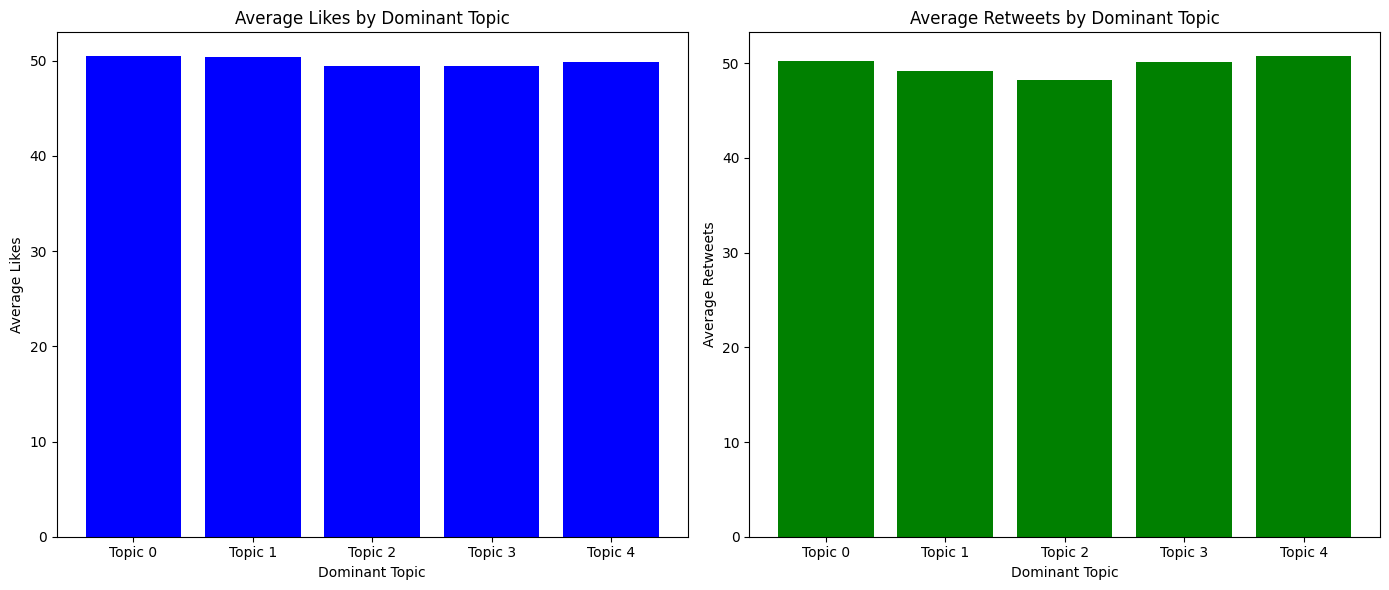

In [17]:
# Assign the dominant topic to each tweet in the full dataset
full_topic_results = lda.transform(count_data)
twitter_data['dominant_topic'] = full_topic_results.argmax(axis=1)

# Calculate average likes and retweets for each dominant topic in the full dataset
full_topic_engagement_likes = twitter_data.groupby('dominant_topic')['Likes'].mean()
full_topic_engagement_retweets = twitter_data.groupby('dominant_topic')['Retweets'].mean()

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Likes by dominant topic
ax[0].bar(full_topic_engagement_likes.index, full_topic_engagement_likes.values, color='blue')
ax[0].set_title('Average Likes by Dominant Topic')
ax[0].set_xlabel('Dominant Topic')
ax[0].set_ylabel('Average Likes')
ax[0].set_xticks(full_topic_engagement_likes.index)
ax[0].set_xticklabels([f'Topic {i}' for i in full_topic_engagement_likes.index])

# Retweets by dominant topic
ax[1].bar(full_topic_engagement_retweets.index, full_topic_engagement_retweets.values, color='green')
ax[1].set_title('Average Retweets by Dominant Topic')
ax[1].set_xlabel('Dominant Topic')
ax[1].set_ylabel('Average Retweets')
ax[1].set_xticks(full_topic_engagement_retweets.index)
ax[1].set_xticklabels([f'Topic {i}' for i in full_topic_engagement_retweets.index])

plt.tight_layout()
plt.show()


In [23]:
twitter_data

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp,cleaned_text,sentiment,hour_of_day,day_of_week,month,readability_score,avg_word_length,sentence_length,dominant_topic,entities
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51,party least receive say single prevent prevent...,0.115714,11,Monday,1,24.11,5.966667,30,4,"[(evening, TIME)]"
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58,hotel still congress may member staff media dr...,0.211111,22,Monday,1,37.64,5.560000,25,2,NaN
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19,nice debate industry year film generation push...,0.220000,11,Wednesday,1,17.68,5.785714,28,0,NaN
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29,laugh explain situation career occur serious f...,0.054762,22,Monday,4,28.17,6.000000,26,1,"[(five, CARDINAL), (billion, CARDINAL)]"
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21,involve sense former often approach government...,0.033333,7,Tuesday,1,11.59,6.117647,34,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,ntate,Agree reflect military box ability ever hold. ...,81,86,2023-01-15 11:46:20,agree reflect military box ability ever hold i...,-0.150000,11,Sunday,1,15.99,5.605263,38,3,NaN
9996,9997,garrisonjoshua,Born which push still. Degree sometimes contro...,73,100,2023-05-06 00:46:54,born push still degree sometimes control space...,0.046667,0,Saturday,5,34.94,5.611111,36,1,NaN
9997,9998,adriennejackson,You day agent likely region. Teacher data mess...,10,62,2023-02-27 14:55:08,day agent likely region teacher data message b...,-0.090476,14,Monday,2,46.44,4.939394,33,1,NaN
9998,9999,kcarlson,Guess without successful save. Particular natu...,21,60,2023-01-09 16:09:35,guess without successful save particular natur...,0.253770,16,Monday,1,20.05,6.029412,34,3,NaN


Let’s begin with Temporal Trends. We’ll examine engagement trends over the available timeline to see if there are noticeable patterns or peaks in activity.

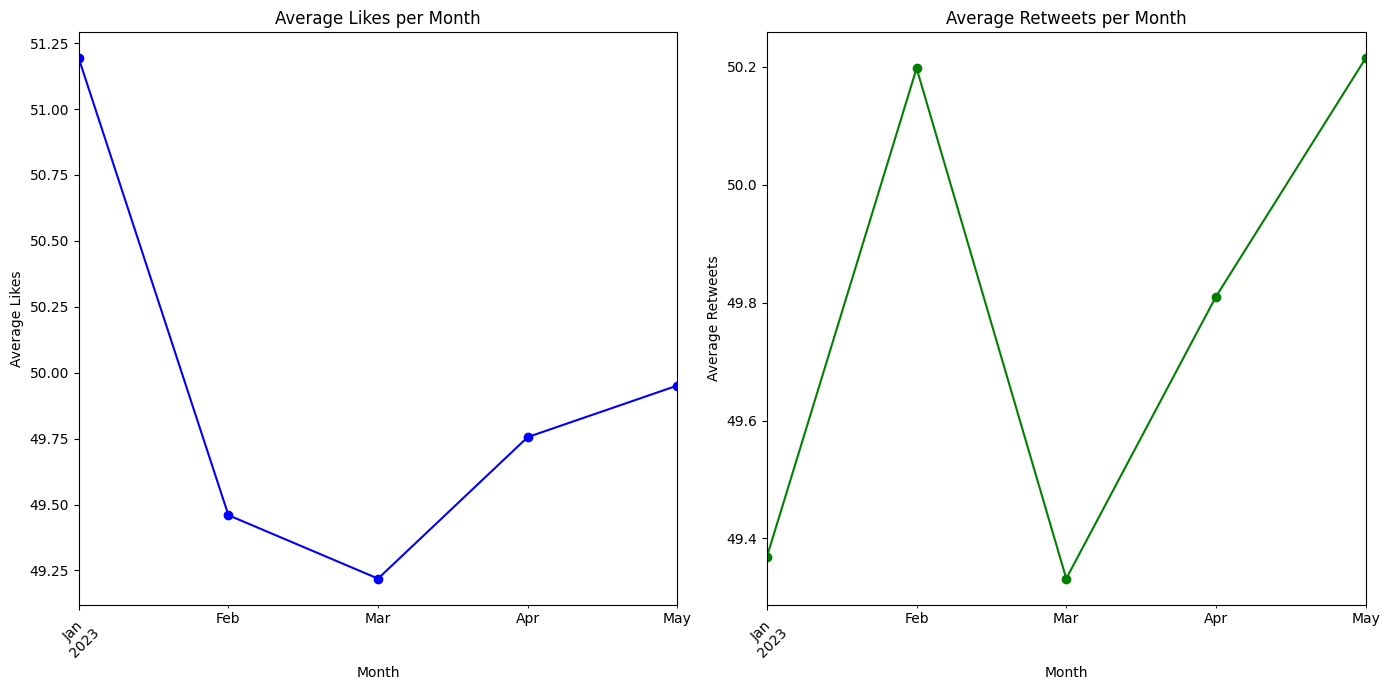

In [19]:
# Group data by month to analyze temporal trends
monthly_likes = twitter_data.groupby(twitter_data['Timestamp'].dt.to_period("M"))['Likes'].mean()
monthly_retweets = twitter_data.groupby(twitter_data['Timestamp'].dt.to_period("M"))['Retweets'].mean()

# Visualization
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
monthly_likes.plot(kind='line', marker='o', color='blue')
plt.title('Average Likes per Month')
plt.xlabel('Month')
plt.ylabel('Average Likes')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
monthly_retweets.plot(kind='line', marker='o', color='green')
plt.title('Average Retweets per Month')
plt.xlabel('Month')
plt.ylabel('Average Retweets')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [20]:
pip install spacy


For the advanced text analysis using Named Entity Recognition (NER), we'll utilize the spaCy library, which is a powerful tool for NLP tasks including NER. The goal here will be to extract entities such as people, organizations, locations, and other identifiers from the tweet text, and then analyze their prevalence and potential impact on engagement metrics.

Let's start by extracting named entities from the tweets, and then we'll visualize the most common entities to see if certain types are more prevalent or possibly correlate with higher engagement.

In [22]:
import spacy

# Load the English NLP model from spaCy
nlp = spacy.load('en_core_web_sm')

# Function to extract named entities
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Apply the NER function to a sample of the dataset to manage processing load
twitter_data['entities'] = twitter_data['cleaned_text'].sample(n=1000, random_state=42).apply(extract_entities)

# Display the entities extracted for the first few samples
twitter_data['entities'].head()


0                          [(evening, TIME)]
1                                        NaN
2                                        NaN
3    [(five, CARDINAL), (billion, CARDINAL)]
4                                        NaN
Name: entities, dtype: object

Sentiment Over Time Analysis
First, let's recalculate the sentiment for all tweets, then group by month to analyze the sentiment trends over time. We'll then plot these trends alongside average engagement metrics for comparison.

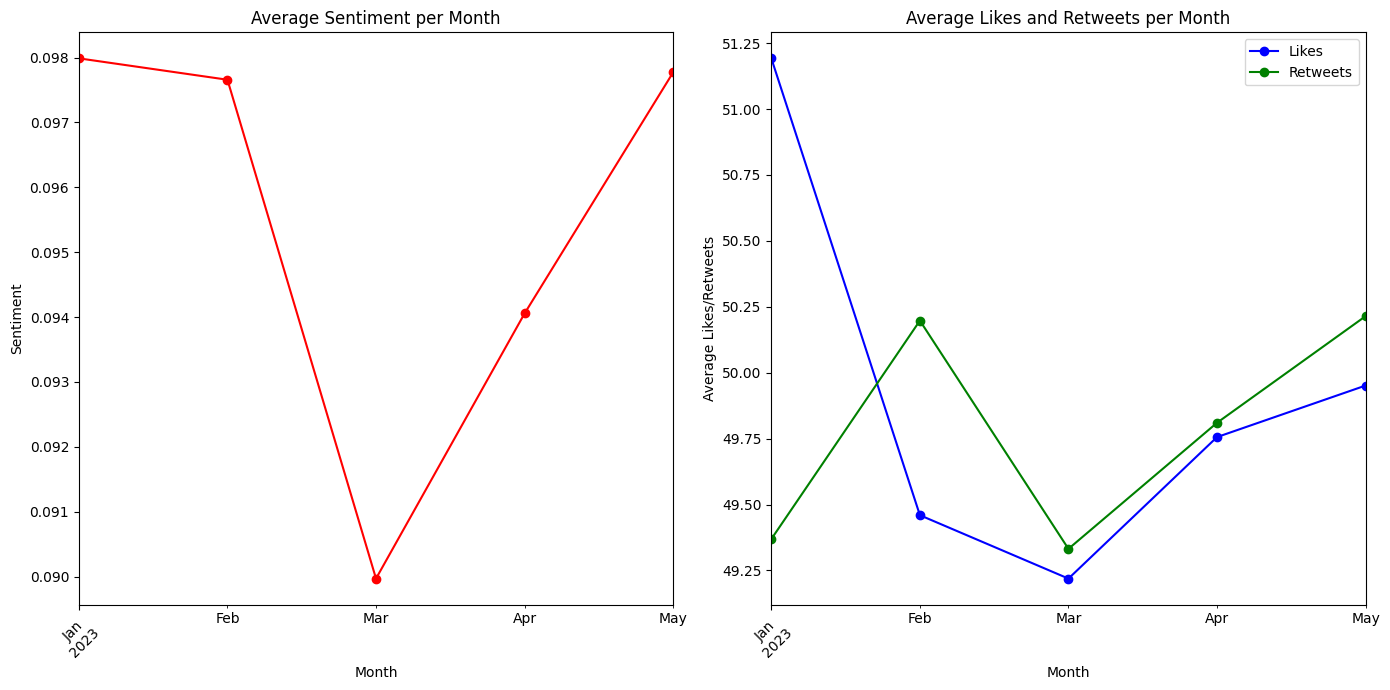

In [24]:
from textblob import TextBlob

# Calculate sentiment for all tweets (not just a sample this time)
twitter_data['sentiment'] = twitter_data['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Group data by month and calculate average sentiment, likes, and retweets
monthly_sentiment = twitter_data.groupby(twitter_data['Timestamp'].dt.to_period("M"))['sentiment'].mean()
monthly_likes = twitter_data.groupby(twitter_data['Timestamp'].dt.to_period("M"))['Likes'].mean()
monthly_retweets = twitter_data.groupby(twitter_data['Timestamp'].dt.to_period("M"))['Retweets'].mean()

# Visualization of Sentiment and Engagement Metrics Over Time
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
monthly_sentiment.plot(kind='line', marker='o', color='red', ylabel='Average Sentiment')
plt.title('Average Sentiment per Month')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Sentiment')

plt.subplot(1, 2, 2)
monthly_likes.plot(kind='line', marker='o', color='blue', label='Likes', ylabel='Average Likes/Retweets')
monthly_retweets.plot(kind='line', marker='o', color='green', label='Retweets')
plt.title('Average Likes and Retweets per Month')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


Extraction: Identify and extract mentions, replies, and hashtags from the tweet text if not separately available.
Quantification: Determine the frequency of tweets containing these features.
Engagement Analysis: Analyze how the presence of mentions, replies, and hashtags affects engagement metrics like likes and retweets.

In [25]:
# Assuming that mentions could be indicated with '@' and hashtags with '#' in the 'Text' column.
# We'll extract these and create new features indicating the presence of mentions and hashtags.

# Function to find mentions and hashtags
def find_mentions(text):
    return ' '.join([word for word in text.split() if word.startswith('@')])

def find_hashtags(text):
    return ' '.join([word for word in text.split() if word.startswith('#')])

# Apply functions to extract mentions and hashtags
twitter_data['mentions'] = twitter_data['Text'].apply(find_mentions)
twitter_data['hashtags'] = twitter_data['Text'].apply(find_hashtags)

# Create binary columns for presence of mentions and hashtags
twitter_data['has_mentions'] = twitter_data['mentions'].apply(lambda x: 1 if x else 0)
twitter_data['has_hashtags'] = twitter_data['hashtags'].apply(lambda x: 1 if x else 0)

# Calculate the average engagement metrics for tweets with and without mentions and hashtags
mentions_likes = twitter_data.groupby('has_mentions')['Likes'].mean()
mentions_retweets = twitter_data.groupby('has_mentions')['Retweets'].mean()
hashtags_likes = twitter_data.groupby('has_hashtags')['Likes'].mean()
hashtags_retweets = twitter_data.groupby('has_hashtags')['Retweets'].mean()

# Display the results
mentions_likes, mentions_retweets, hashtags_likes, hashtags_retweets


(has_mentions
 0    49.9293
 Name: Likes, dtype: float64,
 has_mentions
 0    49.7212
 Name: Retweets, dtype: float64,
 has_hashtags
 0    49.9293
 Name: Likes, dtype: float64,
 has_hashtags
 0    49.7212
 Name: Retweets, dtype: float64)

Link Analysis
We'll start by identifying whether tweets contain URLs, assuming links start with 'http'. Then, we'll calculate average engagement metrics for tweets with and without links.

In [30]:
# Function to detect the presence of a URL based on common URL patterns
def contains_link(text):
    return 1 if 'http' in text else 0

# Apply the function to detect links in tweets
twitter_data['contains_link'] = twitter_data['Text'].apply(contains_link)

# Calculate the average engagement metrics for tweets with and without links
link_engagement_likes = twitter_data.groupby('contains_link')['Likes'].mean()
link_engagement_retweets = twitter_data.groupby('contains_link')['Retweets'].mean()

# Display the results
link_engagement_likes, link_engagement_retweets


(contains_link
 0    49.9293
 Name: Likes, dtype: float64,
 contains_link
 0    49.7212
 Name: Retweets, dtype: float64)

Keyword Impact Analysis
Next, we'll identify and analyze the impact of specific keywords or phrases on engagement. We'll extract the most frequent terms from the tweets, then analyze how tweets containing these terms compare in terms of engagement metrics.

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer to extract top 20 most frequent words
vectorizer = CountVectorizer(max_features=20, stop_words='english')
X = vectorizer.fit_transform(twitter_data['cleaned_text'])

# Get the feature names which represent the most frequent words
top_words = vectorizer.get_feature_names_out()

# Function to check if the tweet contains the top word
def contains_keyword(text, keyword):
    return 1 if keyword in text else 0

# Analyze the impact of each keyword on average likes and retweets
keyword_engagement = {}
for word in top_words:
    twitter_data[word] = twitter_data['cleaned_text'].apply(contains_keyword, keyword=word)
    avg_likes = twitter_data[twitter_data[word] == 1]['Likes'].mean()
    avg_retweets = twitter_data[twitter_data[word] == 1]['Retweets'].mean()
    keyword_engagement[word] = (avg_likes, avg_retweets)

keyword_engagement


{'add': (51.55263157894737, 50.09002770083102),
 'agree': (49.59598853868195, 49.57163323782235),
 'boy': (51.6796875, 48.768229166666664),
 'check': (50.12137203166227, 52.010554089709764),
 'edge': (49.312242090784046, 49.56808803301238),
 'exactly': (51.95854922279793, 49.494818652849744),
 'food': (48.888888888888886, 49.304909560723516),
 'forget': (50.12919896640827, 50.51679586563308),
 'hard': (50.18978102189781, 50.32846715328467),
 'high': (50.354922279792746, 49.63212435233161),
 'job': (47.38320209973753, 51.91338582677165),
 'man': (50.93744821872411, 49.08036454018227),
 'maybe': (51.68542199488491, 47.168797953964194),
 'scene': (49.575916230366495, 52.37434554973822),
 'senior': (51.115485564304464, 49.16272965879265),
 'success': (47.902834008097166, 50.64507422402159),
 'tax': (49.2825, 48.13),
 'teach': (51.81843191196699, 49.397524071526824),
 'yard': (50.365038560411314, 49.167095115681235),
 'young': (49.49869451697128, 50.297650130548305)}

 Feature Engineering
We'll start by creating TF-IDF features from the tweet text, and prepare a dataset including these text features and any other available features for model training.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize TF-IDF Vectorizer to convert text to vector
tfidf_vectorizer = TfidfVectorizer(max_features=100)
tfidf_features = tfidf_vectorizer.fit_transform(twitter_data['cleaned_text'])

# Convert TF-IDF features to DataFrame for easier handling
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Prepare the dataset with TF-IDF features and 'contains_link' as an additional feature
model_data = pd.concat([tfidf_df, twitter_data['contains_link'].reset_index(drop=True)], axis=1)
target_likes = twitter_data['Likes']
target_retweets = twitter_data['Retweets']

# Split the data into training and testing sets
X_train_likes, X_test_likes, y_train_likes, y_test_likes = train_test_split(model_data, target_likes, test_size=0.2, random_state=42)
X_train_retweets, X_test_retweets, y_train_retweets, y_test_retweets = train_test_split(model_data, target_retweets, test_size=0.2, random_state=42)

# Train a Random Forest Regressor for predicting Likes
regressor_likes = RandomForestRegressor(n_estimators=100, random_state=42)
regressor_likes.fit(X_train_likes, y_train_likes)

# Predict on the test set
predicted_likes = regressor_likes.predict(X_test_likes)

# Calculate MSE for Likes
mse_likes = mean_squared_error(y_test_likes, predicted_likes)

mse_likes


941.7569922781915

Enhancing the model by incorporating more features can provide a more robust understanding of what drives engagement on Twitter. Let's proceed by adding additional features that we hypothesized could impact engagement:

Time of Day and Day of the Week: These temporal features might capture variations in user activity.
Sentiment Score: Reflects the overall sentiment of the tweet, which could influence engagement.

In [32]:
from sklearn.preprocessing import StandardScaler

# Calculate the hour of day and day of week
twitter_data['hour_of_day'] = twitter_data['Timestamp'].dt.hour
twitter_data['day_of_week'] = twitter_data['Timestamp'].dt.dayofweek  # Encode as 0=Monday, 6=Sunday

# Scale hour of day and day of week to be more suitable for regression models
scaler = StandardScaler()
scaled_temporal_features = scaler.fit_transform(twitter_data[['hour_of_day', 'day_of_week', 'sentiment']])

# Convert scaled features into a DataFrame
temporal_features_df = pd.DataFrame(scaled_temporal_features, columns=['hour_of_day', 'day_of_week', 'sentiment'])

# Combine all features: TF-IDF, link presence, and new temporal/sentiment features
enhanced_model_data = pd.concat([model_data, temporal_features_df.reset_index(drop=True)], axis=1)

# Split the enhanced data into training and testing sets
X_train_enh, X_test_enh, y_train_enh, y_test_enh = train_test_split(enhanced_model_data, target_likes, test_size=0.2, random_state=42)

# Train a new Random Forest Regressor on the enhanced dataset
enhanced_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
enhanced_regressor.fit(X_train_enh, y_train_enh)

# Predict on the enhanced test set
predicted_enh_likes = enhanced_regressor.predict(X_test_enh)

# Calculate MSE for the enhanced model
mse_enh_likes = mean_squared_error(y_test_enh, predicted_enh_likes)

mse_enh_likes


900.5374489000001